In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0396d743e31ba3f8ee75ae1e2d476f1


In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 35.96,
  'feels_like': 30.43,
  'temp_min': 33.01,
  'temp_max': 39.2,
  'pressure': 1010,
  'humidity': 80},
 'visibility': 16093,
 'wind': {'speed': 3.06, 'deg': 274},
 'clouds': {'all': 20},
 'dt': 1587269677,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1587290159,
  'sunset': 1587339006},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

663

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kenai
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | manaus
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | ucluelet
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | maragogi
Processing Record 16 of Set 1 | fort nelson
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | haines junction
Processing Record 24 of Set 1 | hobart


Processing Record 36 of Set 4 | quirinopolis
Processing Record 37 of Set 4 | sola
Processing Record 38 of Set 4 | bondo
Processing Record 39 of Set 4 | waingapu
Processing Record 40 of Set 4 | sioux lookout
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 4 | umm lajj
Processing Record 45 of Set 4 | goderich
Processing Record 46 of Set 4 | manokwari
Processing Record 47 of Set 4 | johnstown
Processing Record 48 of Set 4 | waipawa
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | faanui
Processing Record 1 of Set 5 | namatanai
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | ugoofaaru
Processing Record 4 of Set 5 | puerto cortes
City not found. Skipping...
Processing Record 5 of Set 5 | coahuayana
Processing Record 6 of Set 5 | szeged
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record

City not found. Skipping...
Processing Record 24 of Set 8 | ilulissat
Processing Record 25 of Set 8 | severo-kurilsk
Processing Record 26 of Set 8 | rundu
Processing Record 27 of Set 8 | leh
Processing Record 28 of Set 8 | makakilo city
Processing Record 29 of Set 8 | mount pleasant
Processing Record 30 of Set 8 | naftah
City not found. Skipping...
Processing Record 31 of Set 8 | wilhelmsburg
Processing Record 32 of Set 8 | lata
Processing Record 33 of Set 8 | kisangani
Processing Record 34 of Set 8 | verkhoyansk
Processing Record 35 of Set 8 | union city
Processing Record 36 of Set 8 | pokosnoye
Processing Record 37 of Set 8 | vicosa
Processing Record 38 of Set 8 | codrington
Processing Record 39 of Set 8 | phimai
Processing Record 40 of Set 8 | turukhansk
Processing Record 41 of Set 8 | laguna
Processing Record 42 of Set 8 | kuching
Processing Record 43 of Set 8 | nadterechnoye
Processing Record 44 of Set 8 | brightwater
Processing Record 45 of Set 8 | skjervoy
Processing Record 46 o

Processing Record 10 of Set 12 | carutapera
Processing Record 11 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 12 | voh
Processing Record 13 of Set 12 | wattegama
Processing Record 14 of Set 12 | jinchang
Processing Record 15 of Set 12 | mitchell
Processing Record 16 of Set 12 | vyritsa
Processing Record 17 of Set 12 | arlit
Processing Record 18 of Set 12 | chongwe
Processing Record 19 of Set 12 | sitka
Processing Record 20 of Set 12 | aguimes
Processing Record 21 of Set 12 | yamada
Processing Record 22 of Set 12 | sistranda
Processing Record 23 of Set 12 | lixourion
Processing Record 24 of Set 12 | whitianga
Processing Record 25 of Set 12 | nynashamn
Processing Record 26 of Set 12 | shache
Processing Record 27 of Set 12 | yorkton
Processing Record 28 of Set 12 | quelimane
Processing Record 29 of Set 12 | prescott
Processing Record 30 of Set 12 | kil
Processing Record 31 of Set 12 | chyhyryn
Processing Record 32 of Set 12 | saint-augustin
Processing Re

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kenai,60.55,-151.26,48.20,86,90,8.05,US,2020-04-19 04:15:47
1,Saskylakh,71.92,114.08,19.65,88,0,7.00,RU,2020-04-19 04:15:47
2,Souillac,-20.52,57.52,78.80,74,40,14.99,MU,2020-04-19 04:15:48
3,Guerrero Negro,27.98,-114.06,60.64,72,0,19.42,MX,2020-04-19 04:15:48
4,Manaus,-3.10,-60.02,77.00,88,100,5.82,BR,2020-04-19 04:15:48
5,Rikitea,-23.12,-134.97,77.45,69,71,7.36,PF,2020-04-19 04:15:49
6,Hilo,19.73,-155.09,78.80,57,90,9.17,US,2020-04-19 04:15:49
7,Mahebourg,-20.41,57.70,78.80,74,40,14.99,MU,2020-04-19 04:11:00
8,Ucluelet,48.93,-125.55,52.00,86,19,2.98,CA,2020-04-19 04:15:17
9,Bengkulu,-3.80,102.27,86.88,61,52,1.03,ID,2020-04-19 04:15:50


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kenai,US,2020-04-19 04:15:47,60.55,-151.26,48.20,86,90,8.05
1,Saskylakh,RU,2020-04-19 04:15:47,71.92,114.08,19.65,88,0,7.00
2,Souillac,MU,2020-04-19 04:15:48,-20.52,57.52,78.80,74,40,14.99
3,Guerrero Negro,MX,2020-04-19 04:15:48,27.98,-114.06,60.64,72,0,19.42
4,Manaus,BR,2020-04-19 04:15:48,-3.10,-60.02,77.00,88,100,5.82
5,Rikitea,PF,2020-04-19 04:15:49,-23.12,-134.97,77.45,69,71,7.36
6,Hilo,US,2020-04-19 04:15:49,19.73,-155.09,78.80,57,90,9.17
7,Mahebourg,MU,2020-04-19 04:11:00,-20.41,57.70,78.80,74,40,14.99
8,Ucluelet,CA,2020-04-19 04:15:17,48.93,-125.55,52.00,86,19,2.98
9,Bengkulu,ID,2020-04-19 04:15:50,-3.80,102.27,86.88,61,52,1.03


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time

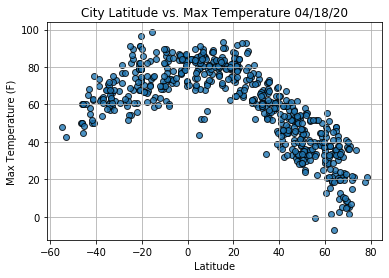

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

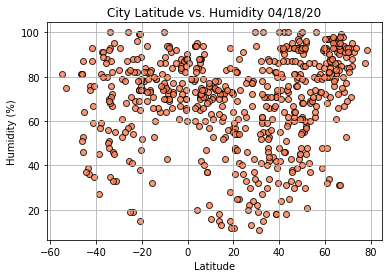

In [16]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o", c="coral",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

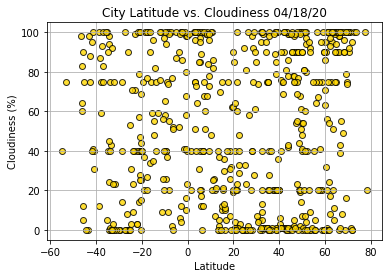

In [17]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", c="gold",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

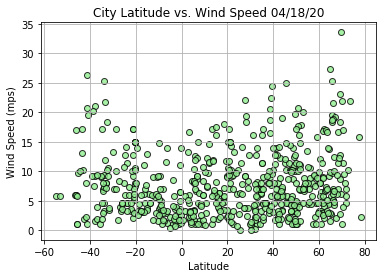

In [18]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", c="lightgreen",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mps)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

In [21]:
p_value

5.788718238141986e-77

In [22]:
slope

-0.4140491088593027

In [23]:
print(slope, intercept, r_value, p_value, std_err)

-0.4140491088593027 67.65674722178181 -0.6613252766198923 5.788718238141986e-77 0.019172548081904415


In [24]:
# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats * slope + intercept

In [25]:
regress_values

0      42.586074
1      37.878335
2      76.153035
3      56.071653
4      68.940299
         ...    
597    44.697724
598    58.783675
599    61.715143
600    50.378478
601    60.029963
Name: Lat, Length: 602, dtype: float64

In [26]:
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.41x + 67.66'

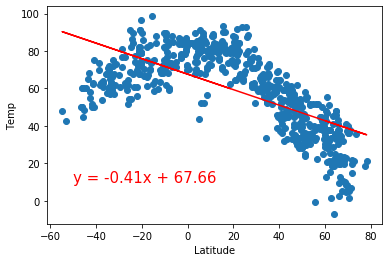

In [91]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (-50,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')

plt.show()

In [66]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    # Added a title - it was missing in the module thus no title was displayed in the scatterplot when the function was called
    # Used suptitle ibstead of title due to an error "'str' is not callable"
    plt.suptitle(title)      
    plt.show()

In [67]:
index13 = city_data_df.loc[13]
index13

City                   Nikolskoye
Country                        RU
Date          2020-04-19 04:15:52
Lat                          59.7
Lng                         30.79
Max Temp                     37.4
Humidity                       92
Cloudiness                     90
Wind Speed                   8.95
Name: 13, dtype: object

In [68]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
northern_hemi_df.head(15)



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kenai,US,2020-04-19 04:15:47,60.55,-151.26,48.20,86,90,8.05
1,Saskylakh,RU,2020-04-19 04:15:47,71.92,114.08,19.65,88,0,7.00
3,Guerrero Negro,MX,2020-04-19 04:15:48,27.98,-114.06,60.64,72,0,19.42
6,Hilo,US,2020-04-19 04:15:49,19.73,-155.09,78.80,57,90,9.17
8,Ucluelet,CA,2020-04-19 04:15:17,48.93,-125.55,52.00,86,19,2.98
12,Norman Wells,CA,2020-04-19 04:15:52,65.28,-126.83,33.80,91,90,5.82
13,Nikolskoye,RU,2020-04-19 04:15:52,59.70,30.79,37.40,92,90,8.95
15,Fort Nelson,CA,2020-04-19 04:15:53,58.81,-122.70,50.00,39,20,4.70
18,Albany,US,2020-04-19 04:12:11,42.60,-73.97,39.00,46,1,1.01
19,Ribeira Grande,PT,2020-04-19 04:15:54,38.52,-28.70,60.64,71,79,20.60


In [69]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Souillac,MU,2020-04-19 04:15:48,-20.52,57.52,78.80,74,40,14.99
4,Manaus,BR,2020-04-19 04:15:48,-3.10,-60.02,77.00,88,100,5.82
5,Rikitea,PF,2020-04-19 04:15:49,-23.12,-134.97,77.45,69,71,7.36
7,Mahebourg,MU,2020-04-19 04:11:00,-20.41,57.70,78.80,74,40,14.99
9,Bengkulu,ID,2020-04-19 04:15:50,-3.80,102.27,86.88,61,52,1.03
10,Alice Springs,AU,2020-04-19 04:15:51,-23.70,133.88,89.60,19,9,4.70
11,Atuona,PF,2020-04-19 04:15:51,-9.80,-139.03,81.81,76,65,14.81
14,Maragogi,BR,2020-04-19 04:15:52,-9.01,-35.22,79.77,80,100,4.90
16,Port Elizabeth,ZA,2020-04-19 04:11:51,-33.92,25.57,57.20,100,0,4.70
17,Ushuaia,AR,2020-04-19 04:15:53,-54.80,-68.30,48.20,81,40,5.82


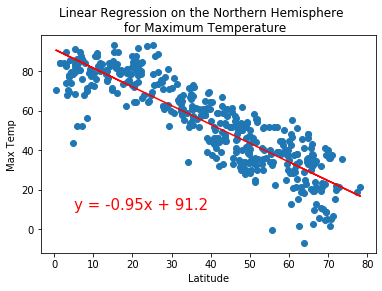

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(5,10))

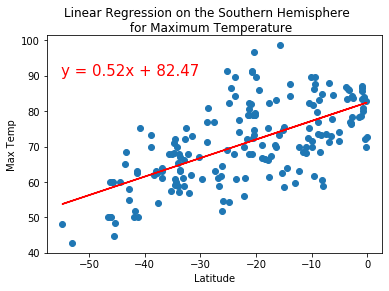

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

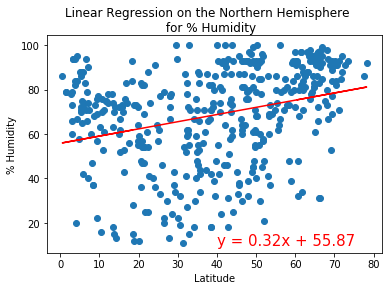

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

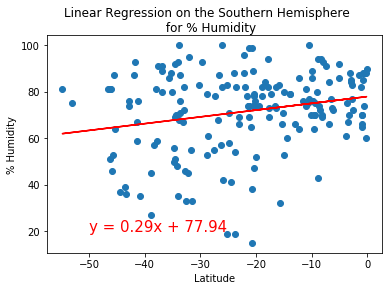

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

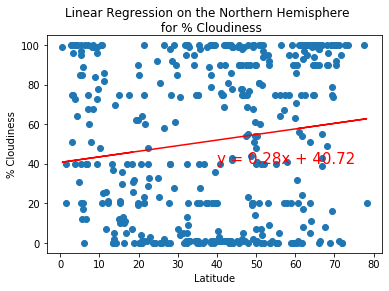

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,40))

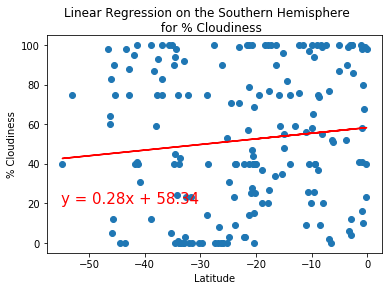

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,20))

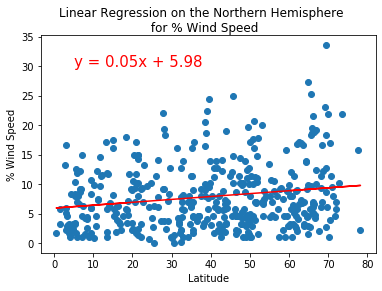

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Wind Speed', '% Wind Speed',(5,30))

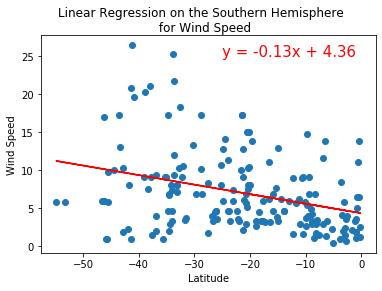

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,25))